In [1]:
import pandas as pd
import os
import numpy as np

def read_csv_files_to_columns(folder_path):
    all_files = os.listdir(folder_path)
    csv_files = [f for f in all_files if f.endswith('.csv')]
    
    combined_df = pd.DataFrame()
    
    for i, file in enumerate(csv_files, start=1):
        file_path = os.path.join(folder_path, file)
        # Read CSV file with the 'High' header
        df_temp = pd.read_csv(file_path, usecols=['High'])
        # Rename the column to reflect its file origin
        df_temp.rename(columns={'High': f'High_{i}'}, inplace=True)
        combined_df = pd.concat([combined_df, df_temp], axis=1)
    
    return combined_df

pumpFolder = "C:/Users/mahrouaa/CS283_Project/DataPump/CS283/new_1m_binance"
randomFolder = "C:/Users/mahrouaa/CS283_Project/DataPump/CS283/random1m"

pump_df = read_csv_files_to_columns(pumpFolder)
random_df = read_csv_files_to_columns(randomFolder)
pump_df = pump_df.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
random_df = random_df.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

pump_df = pump_df.iloc[:, :466]
random_df = random_df.iloc[:, :466]

pump_series = pump_df.to_numpy().T
random_series = random_df.to_numpy().T


In [2]:
pump_df

High_1    High_2  High_3    High_4    High_5    High_6    High_7  \
0    0.128713  0.240000    0.04  0.111111  0.174242  0.513514  0.069767   
1    0.128713  0.243333    0.04  0.111111  0.200758  0.513514  0.093023   
2    0.178218  0.240000    0.04  0.111111  0.200758  0.513514  0.069767   
3    0.158416  0.240000    0.04  0.111111  0.200758  0.513514  0.069767   
4    0.158416  0.240000    0.04  0.111111  0.200758  0.513514  0.069767   
..        ...       ...     ...       ...       ...       ...       ...   
995  0.366337  0.013333    0.10  0.500000  0.348485  0.000000  0.139535   
996  0.366337  0.013333    0.12  0.500000  0.337121  0.000000  0.116279   
997  0.366337  0.013333    0.12  0.500000  0.344697  0.000000  0.116279   
998  0.366337  0.016667    0.12  0.500000  0.337121  0.000000  0.116279   
999  0.366337  0.016667    0.12  0.500000  0.333333  0.000000  0.116279   

       High_8    High_9   High_10  ...  High_457  High_458  High_459  \
0    0.235294  0.071090  0.006623  ...  0.017241  0.093079  0.015385   
1    0.235294  0.071090  0.006623  ...  0.025862  0.093079  0.015385   
2    0.235294  0.071090  0.006623  ...  0.025862  0.093079  0.015385   
3    0.235294  0.071090  0.006623  ...  0.034483  0.064439  0.015385   
4    0.235294  0.071090  0.006623  ...  0.043103  0.064439  0.015385   
..        ...       ...       ...  ...       ...       ...       ...   
995  0.176471  0.180095  0.426049  ...  0.620690  0.085919  0.220000   
996  0.176471  0.175355  0.443709  ...  0.612069  0.085919  0.218462   
997  0.176471  0.175355  0.456954  ...  0.620690  0.085919  0.218462   
998  0.176471  0.175355  0.465784  ...  0.620690  0.085919  0.218462   
999  0.176471  0.175355  0.536424  ...  0.620690  0.085919  0.220000   

     High_460  High_461  High_462  High_463  High_464  High_465  High_466  
0    0.222672  0.011811  0.003195  0.117347  0.000000  0.014989  0.108696  
1    0.287449  0.025591  0.003195  0.117347  0.000000  0.014989  0.108696  
2    0.287449  0.027559  0.003195  0.117347  0.000000  0.014989  0.108696  
3    0.287449  0.027559  0.003195  0.117347  0.004098  0.014989  0.112319  
4    0.287449  0.027559  0.003195  0.112245  0.004098  0.014989  0.112319  
..        ...       ...       ...       ...       ...       ...       ...  
995  0.101215  0.411417  0.217252  0.173469  0.250000  0.289079  0.010870  
996  0.101215  0.409449  0.207668  0.178571  0.245902  0.291221  0.000000  
997  0.101215  0.407480  0.198083  0.178571  0.245902  0.291221  0.000000  
998  0.101215  0.405512  0.217252  0.173469  0.245902  0.289079  0.007246  
999  0.101215  0.421260  0.204473  0.178571  0.245902  0.289079  0.007246  

[1000 rows x 466 columns]

In [3]:
type(pump_series)

numpy.ndarray

# Pump and non-pump

In [4]:
import numpy as np
import pandas as pd
import os
from scipy.spatial.distance import cityblock, cosine
from numpy.linalg import norm
from scipy.stats import pearsonr, wasserstein_distance, ks_2samp, moment, skew, kurtosis
from tqdm import tqdm

def calculate_metrics(series1, series2):
    euclidean_distance = norm(series1 - series2)
    manhattan_distance = cityblock(series1, series2)
    cosine_sim = 1 - cosine(series1, series2)
    correlation, _ = pearsonr(series1, series2)
    emd = wasserstein_distance(series1, series2)
    ks_stat, ks_pvalue = ks_2samp(series1, series2)
    return euclidean_distance, manhattan_distance, cosine_sim, correlation, emd, ks_stat, ks_pvalue

def calculate_group_metrics(group1, group2):
    distances = []
    for series1 in tqdm(group1):
        for series2 in group2:
            metrics = calculate_metrics(series1, series2)
            distances.append(metrics)
    distances = np.array(distances)
    means = np.mean(distances, axis=0)
    stds = np.std(distances, axis=0)
    return means, stds

def print_metrics(title, means, stds):
    metrics_names = ["Euclidean", "Manhattan", "Cosine Similarity", "Pearson Correlation", "Earth Mover's", "KS Statistic"]
    print(title + " Averages and Standard Deviations:")
    for i, name in enumerate(metrics_names):
        print(f"{name}:")
        print("  Mean:", means[i], "  Standard Deviation:", stds[i])

means_cross, stds_cross = calculate_group_metrics(pump_series, random_series)

print_metrics("Cross-Group", means_cross, stds_cross)


100%|████████████████████████████████████████████████████████████████████████████████| 466/466 [07:38<00:00,  1.02it/s]

Cross-Group Averages and Standard Deviations:
Euclidean:
  Mean: 11.501316379822311   Standard Deviation: 3.569278254569206
Manhattan:
  Mean: 304.7710371135659   Standard Deviation: 108.55789261841022
Cosine Similarity:
  Mean: 0.6793486161980439   Standard Deviation: 0.1638909341619188
Pearson Correlation:
  Mean: -0.028265982012654355   Standard Deviation: 0.4096343149179411
Earth Mover's:
  Mean: 0.2421265195021878   Standard Deviation: 0.13039856906456643
KS Statistic:
  Mean: 0.5972532557240063   Standard Deviation: 0.21435412991840036


In [5]:
import numpy as np
from scipy.stats import skew, kurtosis

def calculate_moments(series):
    return {
        'mean': np.mean(series),
        'variance': np.var(series),
        'skewness': skew(series),
        'kurtosis': kurtosis(series)
    }

def aggregate_moments(data):
    moments_data = {'mean': [], 'variance': [], 'skewness': [], 'kurtosis': []}
    
    # Calculate moments for each time series
    for series in data:
        moments = calculate_moments(series)
        for key in moments:
            moments_data[key].append(moments[key])
    
    # Calculate averages and standard deviations for each moment
    aggregated_moments = {}
    for key in moments_data:
        aggregated_moments[f'avg_{key}'] = np.mean(moments_data[key])
        aggregated_moments[f'std_{key}'] = np.std(moments_data[key])
    
    return aggregated_moments

# Calculate aggregated moments for both series
aggregated_moments_pump = aggregate_moments(pump_series)
aggregated_moments_random = aggregate_moments(random_series)

# Print aggregated moments
print("Aggregated Moments for Pump Series:")
for key, value in aggregated_moments_pump.items():
    print(f"{key}: {value:.4f}")

print("\nAggregated Moments for Random Series:")
for key, value in aggregated_moments_random.items():
    print(f"{key}: {value:.4f}")


Aggregated Moments for Pump Series:
avg_mean: 0.1992
std_mean: 0.1034
avg_variance: 0.0231
std_variance: 0.0199
avg_skewness: 2.2963
std_skewness: 3.2683
avg_kurtosis: 24.0336
std_kurtosis: 76.8282

Aggregated Moments for Random Series:
avg_mean: 0.4127
std_mean: 0.1328
avg_variance: 0.0463
std_variance: 0.0223
avg_skewness: 0.4019
std_skewness: 1.0009
avg_kurtosis: 1.2212
std_kurtosis: 7.4486


# Real vs GAN vs VAE vs GP vs Diffusion generated

## Real vs GAN

In [6]:
print("Real")
print(type(pump_series))
print(pump_series.shape)

Real
<class 'numpy.ndarray'>
(466, 1000)


cuda


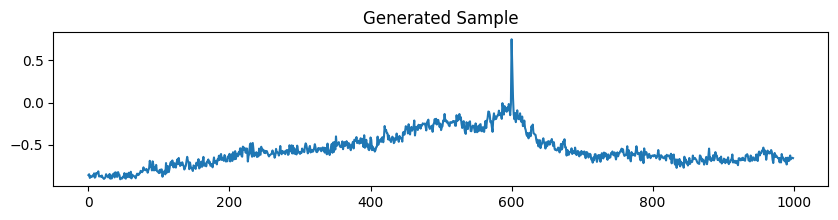

In [7]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


class Generator(nn.Module):
    def __init__(self, input_size, hidden_dim, output_size):
        super(Generator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, hidden_dim),
            nn.ReLU(True),
            nn.Linear(hidden_dim, output_size),
            nn.Tanh()
        )
        
    def forward(self, x):
        return self.fc(x)


def generate_sample(generator, input_size):

    generator.eval()
    with torch.no_grad():
        noise = torch.randn(1, input_size).to(device)
        generated_sample = generator(noise)
        
        plt.figure(figsize=(10, 2))
        plt.plot(generated_sample.cpu().numpy().reshape(-1))
        plt.title("Generated Sample")
        plt.show()


input_size = 100  
hidden_dim = 256
output_size = 1000 

G = Generator(input_size, hidden_dim, output_size).to(device)
G.load_state_dict(torch.load('C:/Users/mahrouaa/CS283_Project/DataPump/CS283/pumpGAN.pth'))

G.eval()

generate_sample(G, input_size)



In [8]:
import pandas as pd
import numpy as np

def generate_multiple_samples(generator, input_size, num_samples):
    generator.eval()
    with torch.no_grad():
        noise = torch.randn(num_samples, input_size).to(device)
        generated_samples = generator(noise)
        return generated_samples.cpu().numpy().T  # Transpose to make each series a column

num_samples = 466
generated_data = generate_multiple_samples(G, input_size, num_samples)

df_generated = pd.DataFrame(generated_data)
df_generated.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_generated

0         1         2         3         4         5         6    \
0   -0.988944 -0.824365 -0.922375 -0.600469 -0.789880 -0.904105 -0.764420   
1   -0.989741 -0.789038 -0.871483 -0.453920 -0.679530 -0.870084 -0.686855   
2   -0.988134 -0.818827 -0.930555 -0.577435 -0.769843 -0.881196 -0.722312   
3   -0.993366 -0.834306 -0.949987 -0.690696 -0.819175 -0.923421 -0.741736   
4   -0.993392 -0.834938 -0.901202 -0.576617 -0.733049 -0.931896 -0.789188   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.584989 -0.456750 -0.955708 -0.949352 -0.912785 -0.460747 -0.395713   
996 -0.578454 -0.457186 -0.962181 -0.959851 -0.928287 -0.440649 -0.437345   
997 -0.578109 -0.453631 -0.977844 -0.969549 -0.941947 -0.380614 -0.418901   
998 -0.534561 -0.412724 -0.936756 -0.940899 -0.900484 -0.365648 -0.397888   
999 -0.667305 -0.454051 -0.952595 -0.959572 -0.911765 -0.413219 -0.439259   

          7         8         9    ...       456       457       458  \
0   -0.927867 -0.910392 -0.768144  ... -0.645314 -0.735495 -0.967617   
1   -0.924260 -0.861818 -0.707591  ... -0.527075 -0.699688 -0.975719   
2   -0.932333 -0.917061 -0.774419  ... -0.626873 -0.749994 -0.984426   
3   -0.933350 -0.923477 -0.774988  ... -0.760061 -0.724375 -0.983528   
4   -0.937847 -0.876657 -0.746922  ... -0.628000 -0.762312 -0.949929   
..        ...       ...       ...  ...       ...       ...       ...   
995 -0.186876 -0.927564 -0.579885  ... -0.954421 -0.376951 -0.921456   
996 -0.190052 -0.934104 -0.560975  ... -0.954991 -0.416540 -0.925014   
997 -0.162747 -0.957736 -0.542074  ... -0.970243 -0.402772 -0.953101   
998 -0.216110 -0.873770 -0.549044  ... -0.912265 -0.400789 -0.902921   
999 -0.124551 -0.912197 -0.576161  ... -0.951040 -0.381119 -0.911156   

          459       460       461       462       463       464       465  
0   -0.818957 -0.999338 -0.915062 -0.792334 -0.982882 -0.998017 -0.724688  
1   -0.698522 -0.999884 -0.913255 -0.723502 -0.972421 -0.999391 -0.327055  
2   -0.793002 -0.999925 -0.947695 -0.770649 -0.991170 -0.999538 -0.461130  
3   -0.854181 -0.999074 -0.911312 -0.775550 -0.983343 -0.998109 -0.502289  
4   -0.744961 -0.999853 -0.932924 -0.761286 -0.980108 -0.999256 -0.481322  
..        ...       ...       ...       ...       ...       ...       ...  
995 -0.933701 -0.871755 -0.390105 -0.469846 -0.944468 -0.534310 -0.443879  
996 -0.941397 -0.892623 -0.439897 -0.480338 -0.960671 -0.529266 -0.545985  
997 -0.957247 -0.948613 -0.349048 -0.458369 -0.965669 -0.712961 -0.572551  
998 -0.904729 -0.873825 -0.416437 -0.430153 -0.928568 -0.570168 -0.528507  
999 -0.924366 -0.828647 -0.431304 -0.418286 -0.947519 -0.485163 -0.550049  

[1000 rows x 466 columns]

In [9]:
gan_series = df_generated.to_numpy().T
print("GAN")
print(type(gan_series))
print(gan_series.shape)

GAN
<class 'numpy.ndarray'>
(466, 1000)


In [10]:
import numpy as np
import pandas as pd
import os
from scipy.spatial.distance import cityblock, cosine
from numpy.linalg import norm
from scipy.stats import pearsonr, wasserstein_distance, ks_2samp, moment, skew, kurtosis
from tqdm import tqdm

def calculate_metrics(series1, series2):
    euclidean_distance = norm(series1 - series2)
    manhattan_distance = cityblock(series1, series2)
    cosine_sim = 1 - cosine(series1, series2)
    correlation, _ = pearsonr(series1, series2)
    emd = wasserstein_distance(series1, series2)
    ks_stat, ks_pvalue = ks_2samp(series1, series2)
    return euclidean_distance, manhattan_distance, cosine_sim, correlation, emd, ks_stat, ks_pvalue

def calculate_group_metrics(group1, group2):
    distances = []
    for series1 in tqdm(group1):
        for series2 in group2:
            metrics = calculate_metrics(series1, series2)
            distances.append(metrics)
    distances = np.array(distances)
    means = np.mean(distances, axis=0)
    stds = np.std(distances, axis=0)
    return means, stds

def print_metrics(title, means, stds):
    metrics_names = ["Euclidean", "Manhattan", "Cosine Similarity", "Pearson Correlation", "Earth Mover's", "KS Statistic"]
    print(title + " Averages and Standard Deviations:")
    for i, name in enumerate(metrics_names):
        print(f"{name}:")
        print("  Mean:", means[i], "  Standard Deviation:", stds[i])

# Calculate and print metrics
means_cross, stds_cross = calculate_group_metrics(pump_series, gan_series)

print_metrics("Cross-Group", means_cross, stds_cross)


100%|████████████████████████████████████████████████████████████████████████████████| 466/466 [08:57<00:00,  1.15s/it]

Cross-Group Averages and Standard Deviations:
Euclidean:
  Mean: 29.529314688983803   Standard Deviation: 4.947856229629521
Manhattan:
  Mean: 900.2370067448836   Standard Deviation: 164.38112526045575
Cosine Similarity:
  Mean: -0.6562951233485663   Standard Deviation: 0.18453629225309293
Pearson Correlation:
  Mean: 0.3469856070005485   Standard Deviation: 0.38576337654945814
Earth Mover's:
  Mean: 0.8978297023047109   Standard Deviation: 0.16604507323936762
KS Statistic:
  Mean: 0.9681036167551036   Standard Deviation: 0.05477299852905849


In [11]:
import numpy as np
from scipy.stats import skew, kurtosis

def calculate_moments(series):
    return {
        'mean': np.mean(series),
        'variance': np.var(series),
        'skewness': skew(series),
        'kurtosis': kurtosis(series)
    }

def aggregate_moments(data):
    moments_data = {'mean': [], 'variance': [], 'skewness': [], 'kurtosis': []}
    
    # Calculate moments for each time series
    for series in data:
        moments = calculate_moments(series)
        for key in moments:
            moments_data[key].append(moments[key])
    
    # Calculate averages and standard deviations for each moment
    aggregated_moments = {}
    for key in moments_data:
        aggregated_moments[f'avg_{key}'] = np.mean(moments_data[key])
        aggregated_moments[f'std_{key}'] = np.std(moments_data[key])
    
    return aggregated_moments

# Calculate aggregated moments for both series
aggregated_moments_pump = aggregate_moments(pump_series)
aggregated_moments_random = aggregate_moments(gan_series)

# Print aggregated moments
print("Aggregated Moments for Pump Series:")
for key, value in aggregated_moments_pump.items():
    print(f"{key}: {value:.4f}")

print("\nAggregated Moments for Random Series:")
for key, value in aggregated_moments_random.items():
    print(f"{key}: {value:.4f}")


Aggregated Moments for Pump Series:
avg_mean: 0.1992
std_mean: 0.1034
avg_variance: 0.0231
std_variance: 0.0199
avg_skewness: 2.2963
std_skewness: 3.2683
avg_kurtosis: 24.0336
std_kurtosis: 76.8282

Aggregated Moments for Random Series:
avg_mean: -0.6972
std_mean: 0.1323
avg_variance: 0.0660
std_variance: 0.0605
avg_skewness: 2.3847
std_skewness: 1.8393
avg_kurtosis: 15.7029
std_kurtosis: 25.2071


## Real vs VAE

cuda


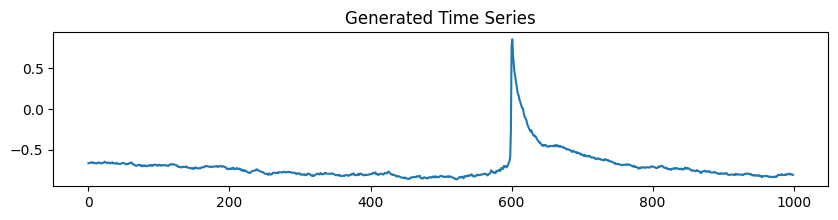

In [12]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

class VAE(nn.Module):
    def __init__(self, input_size, hidden_size, latent_size, dropout_rate=0.5):
        super(VAE, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_size, latent_size * 2)  
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(latent_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_size, input_size)
        )
        
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std
    
    def forward(self, x):
        x = self.encoder(x)
        mu, logvar = torch.chunk(x, 2, dim=-1)
        
        z = self.reparameterize(mu, logvar)
        
        x_recon = self.decoder(z)
        return x_recon, mu, logvar

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
latent_size=64

vae = VAE(input_size=1000, hidden_size=256, latent_size=64).to(device)
vae.load_state_dict(torch.load('C:/Users/mahrouaa/CS283_Project/DataPump/CS283/pumpVAE.pth'))
vae.eval()

def generate_sample(vae, latent_size):
    with torch.no_grad():
        z = torch.randn(1, latent_size).to(device)
        generated_time_series = vae.decoder(z)
        generated_time_series_cpu = generated_time_series.cpu()
        generated_time_series_np = generated_time_series_cpu.squeeze().numpy()

        plt.figure(figsize=(10, 2))
        plt.plot(generated_time_series_np)
        plt.title("Generated Time Series")
        plt.show()

# Generate a synthetic time series sample
generate_sample(vae, latent_size)


In [13]:
import pandas as pd
import numpy as np

def generate_multiple_samples(vae, latent_size, num_samples):
    with torch.no_grad():
        z = torch.randn(num_samples, latent_size).to(device)
        generated_time_series = vae.decoder(z)
        generated_time_series_cpu = generated_time_series.cpu()
        return generated_time_series_cpu.numpy().T  # Transpose to make each series a column

# Generate 466 synthetic time series
num_samples = 466
generated_data = generate_multiple_samples(vae, latent_size, num_samples)

# Create a DataFrame
df_generated = pd.DataFrame(generated_data)
df_generated.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_generated

0         1         2         3         4         5         6    \
0   -0.963951 -0.945264 -0.699064 -0.772746 -0.363667 -0.734486 -0.966344   
1   -0.939430 -0.939302 -0.701238 -0.763794 -0.366070 -0.724353 -0.956896   
2   -0.928925 -0.934919 -0.702919 -0.770342 -0.368775 -0.728147 -0.951818   
3   -0.947905 -0.939458 -0.702386 -0.774043 -0.370231 -0.731198 -0.957081   
4   -0.946311 -0.933355 -0.701443 -0.772959 -0.363108 -0.717703 -0.955461   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.327310 -0.775236 -0.782423 -0.910645 -0.843375 -1.059602 -0.634535   
996 -0.319656 -0.772126 -0.786162 -0.908740 -0.838685 -1.051697 -0.631962   
997 -0.302933 -0.767391 -0.786362 -0.904868 -0.841426 -1.053945 -0.628466   
998 -0.303165 -0.773836 -0.792605 -0.909980 -0.847234 -1.060760 -0.629903   
999 -0.302289 -0.766573 -0.791837 -0.893547 -0.857027 -1.065141 -0.631205   

          7         8         9    ...       456       457       458  \
0   -0.916420 -0.900847  0.048385  ... -0.937859 -0.951543 -0.936503   
1   -0.919866 -0.895400  0.040500  ... -0.928038 -0.941194 -0.922635   
2   -0.920874 -0.892320  0.052079  ... -0.922397 -0.937666 -0.917275   
3   -0.927752 -0.892445  0.043214  ... -0.924215 -0.933470 -0.916254   
4   -0.911222 -0.887441  0.046013  ... -0.921131 -0.928704 -0.919393   
..        ...       ...       ...  ...       ...       ...       ...   
995 -0.662303 -0.726900 -0.795097  ... -0.612668 -0.938637 -0.857238   
996 -0.658029 -0.720965 -0.785415  ... -0.601920 -0.935339 -0.860294   
997 -0.650312 -0.721756 -0.800388  ... -0.601435 -0.933883 -0.856674   
998 -0.654252 -0.726101 -0.802226  ... -0.608433 -0.941125 -0.862686   
999 -0.637831 -0.727783 -0.817358  ... -0.608505 -0.940038 -0.861982   

          459       460       461       462       463       464       465  
0   -0.714374 -0.883782 -0.904302 -0.938928 -0.703720 -0.935741 -0.702263  
1   -0.718228 -0.880881 -0.891325 -0.927946 -0.698476 -0.930548 -0.691099  
2   -0.713392 -0.875845 -0.883788 -0.924233 -0.704285 -0.928565 -0.695709  
3   -0.716312 -0.879358 -0.888105 -0.927690 -0.709370 -0.931890 -0.690286  
4   -0.716520 -0.879294 -0.894395 -0.921152 -0.689455 -0.924406 -0.685447  
..        ...       ...       ...       ...       ...       ...       ...  
995 -0.390025 -0.382299 -0.943298 -0.885139 -1.007400 -0.316888 -0.807416  
996 -0.377897 -0.382288 -0.938301 -0.877678 -0.998805 -0.312593 -0.812288  
997 -0.373797 -0.374560 -0.931074 -0.874161 -1.001533 -0.309109 -0.807788  
998 -0.381977 -0.372956 -0.939351 -0.879257 -1.006510 -0.310641 -0.808839  
999 -0.373986 -0.370173 -0.936141 -0.877897 -1.004061 -0.306841 -0.816318  

[1000 rows x 466 columns]

In [14]:
vae_series = df_generated.to_numpy().T
print("VAE")
print(type(vae_series))
print(vae_series.shape)

VAE
<class 'numpy.ndarray'>
(466, 1000)


In [15]:
import numpy as np
import pandas as pd
import os
from scipy.spatial.distance import cityblock, cosine
from numpy.linalg import norm
from scipy.stats import pearsonr, wasserstein_distance, ks_2samp, moment, skew, kurtosis
from tqdm import tqdm

def calculate_metrics(series1, series2):
    euclidean_distance = norm(series1 - series2)
    manhattan_distance = cityblock(series1, series2)
    cosine_sim = 1 - cosine(series1, series2)
    correlation, _ = pearsonr(series1, series2)
    emd = wasserstein_distance(series1, series2)
    ks_stat, ks_pvalue = ks_2samp(series1, series2)
    return euclidean_distance, manhattan_distance, cosine_sim, correlation, emd, ks_stat, ks_pvalue

def calculate_group_metrics(group1, group2):
    distances = []
    for series1 in tqdm(group1):
        for series2 in group2:
            metrics = calculate_metrics(series1, series2)
            distances.append(metrics)
    distances = np.array(distances)
    means = np.mean(distances, axis=0)
    stds = np.std(distances, axis=0)
    return means, stds

def print_metrics(title, means, stds):
    metrics_names = ["Euclidean", "Manhattan", "Cosine Similarity", "Pearson Correlation", "Earth Mover's", "KS Statistic"]
    print(title + " Averages and Standard Deviations:")
    for i, name in enumerate(metrics_names):
        print(f"{name}:")
        print("  Mean:", means[i], "  Standard Deviation:", stds[i])

# Calculate and print metrics
means_cross, stds_cross = calculate_group_metrics(pump_series, vae_series)

print_metrics("Cross-Group", means_cross, stds_cross)


100%|████████████████████████████████████████████████████████████████████████████████| 466/466 [09:39<00:00,  1.24s/it]


Cross-Group Averages and Standard Deviations:
Euclidean:
  Mean: 26.890892698266807   Standard Deviation: 5.312179822526625
Manhattan:
  Mean: 816.2930074349985   Standard Deviation: 175.86723513633268
Cosine Similarity:
  Mean: -0.6367914745984852   Standard Deviation: 0.1989091362908882
Pearson Correlation:
  Mean: 0.3748595629819098   Standard Deviation: 0.43093382688892573
Earth Mover's:
  Mean: 0.8148693900258781   Standard Deviation: 0.17756853044172202
KS Statistic:
  Mean: 0.9658999106635076   Standard Deviation: 0.06656980188694028


In [16]:
import numpy as np
from scipy.stats import skew, kurtosis

def calculate_moments(series):
    return {
        'mean': np.mean(series),
        'variance': np.var(series),
        'skewness': skew(series),
        'kurtosis': kurtosis(series)
    }

def aggregate_moments(data):
    moments_data = {'mean': [], 'variance': [], 'skewness': [], 'kurtosis': []}
    
    # Calculate moments for each time series
    for series in data:
        moments = calculate_moments(series)
        for key in moments:
            moments_data[key].append(moments[key])
    
    # Calculate averages and standard deviations for each moment
    aggregated_moments = {}
    for key in moments_data:
        aggregated_moments[f'avg_{key}'] = np.mean(moments_data[key])
        aggregated_moments[f'std_{key}'] = np.std(moments_data[key])
    
    return aggregated_moments

# Calculate aggregated moments for both series
aggregated_moments_pump = aggregate_moments(pump_series)
aggregated_moments_random = aggregate_moments(vae_series)

# Print aggregated moments
print("Aggregated Moments for Pump Series:")
for key, value in aggregated_moments_pump.items():
    print(f"{key}: {value:.4f}")

print("\nAggregated Moments for Random Series:")
for key, value in aggregated_moments_random.items():
    print(f"{key}: {value:.4f}")


Aggregated Moments for Pump Series:
avg_mean: 0.1992
std_mean: 0.1034
avg_variance: 0.0231
std_variance: 0.0199
avg_skewness: 2.2963
std_skewness: 3.2683
avg_kurtosis: 24.0336
std_kurtosis: 76.8282

Aggregated Moments for Random Series:
avg_mean: -0.6147
std_mean: 0.1465
avg_variance: 0.0580
std_variance: 0.0483
avg_skewness: 1.8301
std_skewness: 1.6736
avg_kurtosis: 10.8693
std_kurtosis: 19.5478


## Real vs GP

In [17]:
import os
import pandas as pd
import numpy as np

folder_path = r"C:\Users\mahrouaa\CS283_Project\DataPump\CS283\new_1m_binance"

returns_list = []

for file in os.listdir(folder_path):
    if file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path, usecols=['returns'])
        returns_list.append(df)

all_returns_df = pd.concat(returns_list, axis=1)
all_returns_df = all_returns_df.drop(all_returns_df.index[0])
all_returns_df

returns   returns   returns   returns   returns  returns   returns  \
1    0.000000  0.242718  0.000000  0.000000  0.168350      0.0  0.724638   
2    0.447227 -0.242131  0.000000  0.000000  0.000000      0.0 -0.719424   
3   -0.178094  0.000000  0.000000  0.000000  0.000000      0.0  0.000000   
4    0.000000  0.000000  0.000000  0.000000  0.000000      0.0  0.000000   
5    0.000000  0.000000  0.000000  0.255102 -0.096038      0.0 -0.724638   
..        ...       ...       ...       ...       ...      ...       ...   
995  0.000000  0.291545  0.000000  0.000000 -0.402748      0.0  0.000000   
996  0.000000  0.000000  0.234192  0.000000 -0.071361      0.0 -0.709220   
997  0.000000  0.000000  0.000000  0.000000  0.047608      0.0  0.000000   
998  0.000000  0.290698  0.000000  0.000000 -0.047585      0.0  0.000000   
999  0.000000  0.000000  0.000000  0.000000 -0.023804      0.0  0.000000   

     returns   returns   returns  ...   returns   returns   returns   returns  \
1        0.0  0.000000  0.000000  ...  0.037383  0.000000  0.000000  0.669176   
2        0.0  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
3        0.0  0.000000  0.000000  ...  0.037369 -0.340909  0.000000  0.000000   
4        0.0  0.000000  0.000000  ...  0.037355  0.000000  0.000000  0.000000   
5        0.0  0.000000  0.419580  ...  0.037341  0.000000  0.036576  0.000000   
..       ...       ...       ...  ...       ...       ...       ...       ...   
995      0.0  0.000000  0.247525  ...  0.000000  0.000000  0.773286  0.000000   
996      0.0 -0.094967  0.493827  ... -0.036430  0.000000 -0.034880  0.000000   
997      0.0  0.000000  0.368550  ...  0.036443  0.000000  0.000000  0.000000   
998      0.0  0.000000  0.244798  ...  0.000000  0.000000  0.000000  0.000000   
999      0.0  0.000000  1.953602  ...  0.000000  0.000000  0.034892  0.000000   

      returns   returns   returns   returns   returns   returns  
1    0.420673  0.000000  0.000000  0.000000  0.000000  0.000000  
2    0.059844  0.000000  0.000000  0.000000  0.000000  0.000000  
3    0.000000  0.000000  0.000000  0.269542  0.000000  0.229885  
4    0.000000  0.000000 -0.333333  0.000000  0.000000  0.000000  
5    0.000000  0.000000  0.000000  0.268817  0.000000  0.000000  
..        ...       ...       ...       ...       ...       ...  
995 -0.107009  0.800000  0.322581  0.000000  0.000000  0.740741  
996 -0.053562 -0.595238  0.321543 -0.231481  0.182482 -0.735294  
997 -0.053591 -0.598802  0.000000  0.000000  0.000000  0.000000  
998 -0.053619  1.204819 -0.320513  0.000000 -0.182149  0.493827  
999  0.429185 -0.793651  0.321543  0.000000  0.000000  0.000000  

[999 rows x 466 columns]

In [18]:
mean_vector = all_returns_df.mean(axis=1)
stdev_vector = all_returns_df.std(axis=1)

df_generated = pd.DataFrame()

initial_price=100
num_series=466

for series_idx in range(num_series):
    return_vector = np.random.normal(mean_vector, stdev_vector)
    price_vector = [initial_price]
    
    for ret in return_vector:
        new_price = price_vector[-1] * (1 + (ret / 100))
        price_vector.append(new_price)
    
    df_generated[f'Series_{series_idx+1}'] = price_vector

df_generated.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_generated

C:\Users\mahrouaa\AppData\Local\Temp\ipykernel_25392\477039018.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_generated[f'Series_{series_idx+1}'] = price_vector
C:\Users\mahrouaa\AppData\Local\Temp\ipykernel_25392\477039018.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_generated[f'Series_{series_idx+1}'] = price_vector
C:\Users\mahrouaa\AppData\Local\Temp\ipykernel_25392\477039018.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which 

Series_1    Series_2    Series_3    Series_4    Series_5    Series_6  \
0    100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
1     99.714071   99.785594  100.099053   99.825126  100.464716  100.165973   
2     99.871639   99.857262  100.354788  100.118495  100.118888   99.571239   
3    100.205729   99.730920  100.629759  100.455319   99.928103   99.189951   
4    100.556174   99.819889  101.398276   99.793847   99.876850   99.151392   
..          ...         ...         ...         ...         ...         ...   
995  350.319068  -31.097683  153.811167   67.160826  288.907738  173.205961   
996  350.896967  -30.874093  153.446319   67.295208  290.175987  173.902208   
997  350.287140  -30.931132  154.131084   67.270637  290.574194  174.337179   
998  348.411709  -31.183682  155.536762   66.752030  288.742729  173.779888   
999  346.065756  -31.090466  156.408848   66.857340  289.706695  171.924599   

       Series_7    Series_8    Series_9   Series_10  ...  Series_457  \
0    100.000000  100.000000  100.000000  100.000000  ...  100.000000   
1    100.697938   99.722048  100.406340   99.976286  ...  100.235230   
2    100.990097   99.839770  100.226970  100.054220  ...  100.331809   
3    101.264156   99.939846  100.213440   99.764649  ...  100.340665   
4    101.624237  100.502405  100.234969   99.983965  ...  100.032280   
..          ...         ...         ...         ...  ...         ...   
995  100.896750  161.139701   40.793854  334.520536  ...    0.532057   
996  101.460478  159.384141   40.805579  331.925652  ...    0.530923   
997  101.451068  158.784362   40.685828  333.771733  ...    0.529224   
998  101.671105  158.686502   40.425668  336.131923  ...    0.535185   
999  102.016504  157.318649   40.261287  333.412377  ...    0.535503   

     Series_458  Series_459  Series_460  Series_461  Series_462  Series_463  \
0    100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
1    100.071372   99.642557  100.476127  100.269236   99.955738   99.286869   
2     99.764092   99.460852  100.534840  100.251917   99.783901   99.282045   
3     99.855633   99.170579  100.456745  100.420066   99.678231   99.156012   
4    100.114991   98.935894  100.208160  100.619879   99.825217   99.262336   
..          ...         ...         ...         ...         ...         ...   
995  102.208378  136.290405  214.922122   60.158767  -32.563670 -219.858123   
996  102.099510  135.883391  213.566041   60.459169  -32.444092 -220.692776   
997  102.361860  136.160320  213.406745   60.340483  -32.471187 -219.858088   
998  101.776050  136.656526  212.013524   60.951845  -32.588413 -219.126883   
999  101.413549  136.199204  213.633546   60.829151  -32.451814 -219.209173   

     Series_464  Series_465  Series_466  
0    100.000000  100.000000  100.000000  
1    100.181332  100.280503   99.948905  
2    100.319051   99.974795   99.665934  
3    100.047487   99.906548   99.329154  
4    100.030363   99.459204   99.724961  
..          ...         ...         ...  
995   60.552522   43.931225  202.732828  
996   60.819260   43.792446  200.847108  
997   61.234436   43.687759  200.900622  
998   61.541493   43.637993  200.673331  
999   61.610547   43.827045  200.216770  

[1000 rows x 466 columns]

In [19]:
gp_series = df_generated.to_numpy().T
print("GP")
print(type(gp_series))
print(gp_series.shape)

GP
<class 'numpy.ndarray'>
(466, 1000)


In [20]:
import numpy as np
import pandas as pd
import os
from scipy.spatial.distance import cityblock, cosine
from numpy.linalg import norm
from scipy.stats import pearsonr, wasserstein_distance, ks_2samp, moment, skew, kurtosis
from tqdm import tqdm

def calculate_metrics(series1, series2):
    euclidean_distance = norm(series1 - series2)
    manhattan_distance = cityblock(series1, series2)
    cosine_sim = 1 - cosine(series1, series2)
    correlation, _ = pearsonr(series1, series2)
    emd = wasserstein_distance(series1, series2)
    ks_stat, ks_pvalue = ks_2samp(series1, series2)
    return euclidean_distance, manhattan_distance, cosine_sim, correlation, emd, ks_stat, ks_pvalue

def calculate_group_metrics(group1, group2):
    distances = []
    for series1 in tqdm(group1):
        for series2 in group2:
            metrics = calculate_metrics(series1, series2)
            distances.append(metrics)
    distances = np.array(distances)
    means = np.mean(distances, axis=0)
    stds = np.std(distances, axis=0)
    return means, stds

def print_metrics(title, means, stds):
    metrics_names = ["Euclidean", "Manhattan", "Cosine Similarity", "Pearson Correlation", "Earth Mover's", "KS Statistic"]
    print(title + " Averages and Standard Deviations:")
    for i, name in enumerate(metrics_names):
        print(f"{name}:")
        print("  Mean:", means[i], "  Standard Deviation:", stds[i])

# Calculate and print metrics
means_cross, stds_cross = calculate_group_metrics(pump_series, gp_series)

print_metrics("Cross-Group", means_cross, stds_cross)


100%|████████████████████████████████████████████████████████████████████████████████| 466/466 [09:10<00:00,  1.18s/it]

Cross-Group Averages and Standard Deviations:
Euclidean:
  Mean: 3917.1193473652975   Standard Deviation: 1593.0376086050615
Manhattan:
  Mean: 115467.58365137424   Standard Deviation: 41384.89700547054
Cosine Similarity:
  Mean: 0.68110966980513   Standard Deviation: 0.28652822728312566
Pearson Correlation:
  Mean: 0.062488431552279636   Standard Deviation: 0.6045431409571124
Earth Mover's:
  Mean: 115.44504260329967   Standard Deviation: 41.40243140467085
KS Statistic:
  Mean: 0.9403395070830047   Standard Deviation: 0.14229667712774516


In [21]:
import numpy as np
from scipy.stats import skew, kurtosis

def calculate_moments(series):
    return {
        'mean': np.mean(series),
        'variance': np.var(series),
        'skewness': skew(series),
        'kurtosis': kurtosis(series)
    }

def aggregate_moments(data):
    moments_data = {'mean': [], 'variance': [], 'skewness': [], 'kurtosis': []}
    
    # Calculate moments for each time series
    for series in data:
        moments = calculate_moments(series)
        for key in moments:
            moments_data[key].append(moments[key])
    
    # Calculate averages and standard deviations for each moment
    aggregated_moments = {}
    for key in moments_data:
        aggregated_moments[f'avg_{key}'] = np.mean(moments_data[key])
        aggregated_moments[f'std_{key}'] = np.std(moments_data[key])
    
    return aggregated_moments

# Calculate aggregated moments for both series
aggregated_moments_pump = aggregate_moments(pump_series)
aggregated_moments_random = aggregate_moments(gp_series)

# Print aggregated moments
print("Aggregated Moments for Pump Series:")
for key, value in aggregated_moments_pump.items():
    print(f"{key}: {value:.4f}")

print("\nAggregated Moments for Random Series:")
for key, value in aggregated_moments_random.items():
    print(f"{key}: {value:.4f}")


Aggregated Moments for Pump Series:
avg_mean: 0.1992
std_mean: 0.1034
avg_variance: 0.0231
std_variance: 0.0199
avg_skewness: 2.2963
std_skewness: 3.2683
avg_kurtosis: 24.0336
std_kurtosis: 76.8282

Aggregated Moments for Random Series:
avg_mean: 109.0341
std_mean: 48.8595
avg_variance: 3650.5335
std_variance: 6125.0124
avg_skewness: 0.2390
std_skewness: 0.7225
avg_kurtosis: -0.4514
std_kurtosis: 4.2217


## Real vs Diffusion

In [22]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

file_path = "C:\\Users\\mahrouaa\\Downloads\\generated_time_series.csv"
data = pd.read_csv(file_path)

sampled_data = data.sample(466, random_state=42)

df_generated = sampled_data
new_column_names = [f"Gen_{i+1}" for i in range(df_generated.shape[1])]
df_generated.columns = new_column_names

scaler = MinMaxScaler()
df_generated = pd.DataFrame(scaler.fit_transform(df_generated.T))

df_generated.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_generated


0         1         2         3         4         5         6    \
0    0.588967  0.487671  0.235339  0.052151  0.900940  0.604287  0.614425   
1    0.583354  0.472857  0.237725  0.055762  0.809665  0.595589  0.606361   
2    0.578511  0.464632  0.240378  0.061030  0.821497  0.598528  0.608737   
3    0.580685  0.475887  0.230674  0.067225  0.809763  0.589472  0.611232   
4    0.580014  0.481150  0.234449  0.007557  0.803007  0.581922  0.600904   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.491395  0.027801  0.037602  0.282113  0.072840  0.055109  0.406778   
996  0.491731  0.031478  0.032754  0.316726  0.064069  0.057056  0.412270   
997  0.496030  0.032003  0.043060  0.299673  0.078986  0.052573  0.415719   
998  0.493897  0.003441  0.008336  0.245472  0.005242  0.025292  0.400830   
999  0.526687  0.009292  0.000000  0.227271  0.000102  0.008327  0.402878   

          7         8         9    ...       456       457       458  \
0    0.557884  0.594141  0.090777  ...  0.569232  0.819477  0.094729   
1    0.552726  0.584043  0.123479  ...  0.564125  0.755729  0.107626   
2    0.548348  0.593820  0.082120  ...  0.560761  0.761188  0.103741   
3    0.549710  0.595613  0.089230  ...  0.562181  0.764224  0.094251   
4    0.518188  0.585851  0.094412  ...  0.541934  0.764272  0.087737   
..        ...       ...       ...  ...       ...       ...       ...   
995  0.411188  0.233637  0.082920  ...  0.475884  0.669291  0.218552   
996  0.415267  0.233211  0.087216  ...  0.476396  0.672963  0.211392   
997  0.412950  0.220852  0.105246  ...  0.487742  0.669460  0.225896   
998  0.396345  0.196630  0.056356  ...  0.480908  0.658115  0.213737   
999  0.436551  0.186277  0.007822  ...  0.519674  0.686727  0.209627   

          459       460       461       462       463       464       465  
0    0.404335  0.820209  0.138266  0.805623  0.626811  0.598130  0.836508  
1    0.408549  0.818781  0.145409  0.703485  0.616713  0.589195  0.826810  
2    0.400013  0.825067  0.144838  0.748690  0.618003  0.581700  0.829976  
3    0.404894  0.819356  0.142988  0.748324  0.616944  0.590120  0.834433  
4    0.344621  0.804180  0.144305  0.744875  0.606954  0.589692  0.816854  
..        ...       ...       ...       ...       ...       ...       ...  
995  0.094205  0.461301  0.072816  0.642052  0.040522  0.058253  0.083243  
996  0.094387  0.454950  0.098465  0.640185  0.043268  0.057480  0.114650  
997  0.098049  0.456345  0.098249  0.651785  0.040874  0.051318  0.133564  
998  0.046283  0.467106  0.063756  0.633710  0.000000  0.000000  0.033633  
999  0.036814  0.468160  0.048708  0.652676  0.001210  0.000000  0.024134  

[1000 rows x 466 columns]

In [23]:
diff_series = df_generated.to_numpy().T
print("Diffusion")
print(type(diff_series))
print(diff_series.shape)

Diffusion
<class 'numpy.ndarray'>
(466, 1000)


In [24]:
import numpy as np
import pandas as pd
import os
from scipy.spatial.distance import cityblock, cosine
from numpy.linalg import norm
from scipy.stats import pearsonr, wasserstein_distance, ks_2samp, moment, skew, kurtosis
from tqdm import tqdm

def calculate_metrics(series1, series2):
    euclidean_distance = norm(series1 - series2)
    manhattan_distance = cityblock(series1, series2)
    cosine_sim = 1 - cosine(series1, series2)
    correlation, _ = pearsonr(series1, series2)
    emd = wasserstein_distance(series1, series2)
    ks_stat, ks_pvalue = ks_2samp(series1, series2)
    return euclidean_distance, manhattan_distance, cosine_sim, correlation, emd, ks_stat, ks_pvalue

def calculate_group_metrics(group1, group2):
    distances = []
    for series1 in tqdm(group1):
        for series2 in group2:
            metrics = calculate_metrics(series1, series2)
            distances.append(metrics)
    distances = np.array(distances)
    means = np.mean(distances, axis=0)
    stds = np.std(distances, axis=0)
    return means, stds

def print_metrics(title, means, stds):
    metrics_names = ["Euclidean", "Manhattan", "Cosine Similarity", "Pearson Correlation", "Earth Mover's", "KS Statistic"]
    print(title + " Averages and Standard Deviations:")
    for i, name in enumerate(metrics_names):
        print(f"{name}:")
        print("  Mean:", means[i], "  Standard Deviation:", stds[i])

# Calculate and print metrics
means_cross, stds_cross = calculate_group_metrics(pump_series, diff_series)

print_metrics("Cross-Group", means_cross, stds_cross)


100%|████████████████████████████████████████████████████████████████████████████████| 466/466 [08:15<00:00,  1.06s/it]

Cross-Group Averages and Standard Deviations:
Euclidean:
  Mean: 9.986303141887609   Standard Deviation: 2.376880967515801
Manhattan:
  Mean: 242.96612522163355   Standard Deviation: 72.35414754353637
Cosine Similarity:
  Mean: 0.45585686744398873   Standard Deviation: 0.16324577030302911
Pearson Correlation:
  Mean: -0.009409776091154173   Standard Deviation: 0.2907703427299751
Earth Mover's:
  Mean: 0.14660490405695922   Standard Deviation: 0.056836763032201774
KS Statistic:
  Mean: 0.4724193483026057   Standard Deviation: 0.10895764552700263


In [25]:
import numpy as np
from scipy.stats import skew, kurtosis

def calculate_moments(series):
    return {
        'mean': np.mean(series),
        'variance': np.var(series),
        'skewness': skew(series),
        'kurtosis': kurtosis(series)
    }

def aggregate_moments(data):
    moments_data = {'mean': [], 'variance': [], 'skewness': [], 'kurtosis': []}
    
    # Calculate moments for each time series
    for series in data:
        moments = calculate_moments(series)
        for key in moments:
            moments_data[key].append(moments[key])
    
    # Calculate averages and standard deviations for each moment
    aggregated_moments = {}
    for key in moments_data:
        aggregated_moments[f'avg_{key}'] = np.mean(moments_data[key])
        aggregated_moments[f'std_{key}'] = np.std(moments_data[key])
    
    return aggregated_moments

# Calculate aggregated moments for both series
aggregated_moments_pump = aggregate_moments(pump_series)
aggregated_moments_random = aggregate_moments(diff_series)

# Print aggregated moments
print("Aggregated Moments for Pump Series:")
for key, value in aggregated_moments_pump.items():
    print(f"{key}: {value:.4f}")

print("\nAggregated Moments for Random Series:")
for key, value in aggregated_moments_random.items():
    print(f"{key}: {value:.4f}")


Aggregated Moments for Pump Series:
avg_mean: 0.1992
std_mean: 0.1034
avg_variance: 0.0231
std_variance: 0.0199
avg_skewness: 2.2963
std_skewness: 3.2683
avg_kurtosis: 24.0336
std_kurtosis: 76.8282

Aggregated Moments for Random Series:
avg_mean: 0.1871
std_mean: 0.0451
avg_variance: 0.0678
std_variance: 0.0254
avg_skewness: 1.2342
std_skewness: 0.3105
avg_kurtosis: 0.3095
std_kurtosis: 1.0292
